## Example: Effect of Holidays on US Births 節假日對美國出生率的影響

> Let's return to some data we worked with earler, in ["Example: Birthrate Data"](03.09-Pivot-Tables.ipynb#Example:-Birthrate-Data), where we generated a plot of average births over the course of the calendar year; as already mentioned, that this data can be downloaded at https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv.

本例中的數據是前面章節我們已經用過的（參見["例子：出生率"](03.09-Pivot-Tables.ipynb#Example:-Birthrate-Data)），當時我們對年內的平均出生數據創建了一個圖表；就像前面已經提到的，這個數據可以在 https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv 下載。

/var/folders/9q/486czkcn7lv5v0hwbt71twdc0000gn/T/ipykernel_7012/1563373283.py:10: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  births_by_date.index = [pd.datetime(2012, month, day) for (month, day) in births_by_date.index]


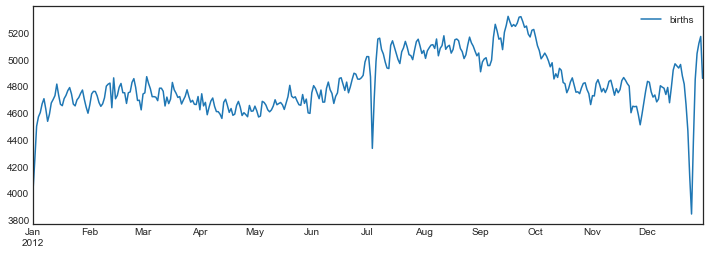

In [9]:
births = pd.read_csv('input/pd-births.csv')

quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births', [births.index.month, births.index.day])
births_by_date.index = [pd.datetime(2012, month, day) for (month, day) in births_by_date.index]

fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

> The ``ax.text`` method takes an x position, a y position, a string, and then optional keywords specifying the color, size, style, alignment, and other properties of the text.
Here we used ``ha='right'`` and ``ha='center'``, where ``ha`` is short for *horizonal alignment*.

`ax.text`方法接收x位置、y位置、一個字符串和額外可選的關鍵字參數可以用來設置顏色、大小、樣式、對齊等文本格式。上面我們使用了`ha='right'`和`ha='center'`，這裡的`ha`是*hirizonal alignment（水平對齊）*的縮寫。

Text(2012-12-25, 3850, 'Christmas ')

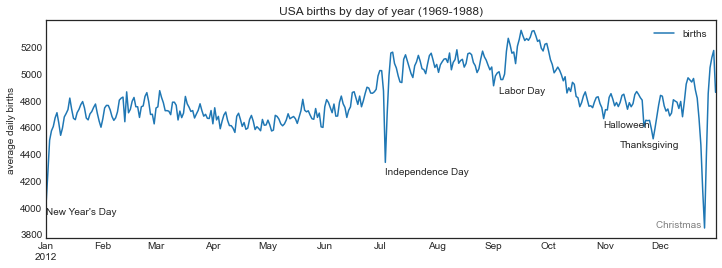

In [10]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

style = dict(size=10, color='gray')
ax.set(title='USA births by day of year (1969-1988)',ylabel='average daily births')

ax.text('2012-1-1', 3950, "New Year's Day")
ax.text('2012-7-4', 4250, "Independence Day")
ax.text('2012-9-4', 4850, "Labor Day")
ax.text('2012-10-31', 4600, "Halloween")
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center')
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)  # style = dict(size=10, color='gray')

> You'll notice that the specifications of the arrows and text boxes are very detailed: this gives you the power to create nearly any arrow style you wish.
Unfortunately, it also means that these sorts of features often must be manually tweaked, a process that can be very time consuming when producing publication-quality graphics!
Finally, I'll note that the preceding mix of styles is by no means best practice for presenting data, but rather included as a demonstration of some of the available options.

上圖中箭頭和文字框都非常詳盡了：可以看出你幾乎可以使用`plt.annotate`創建任何你想要的箭頭樣式。不幸的是，這意味著這種特性都需要手工進行調整，因此如果需要獲得印刷質量的圖像，這將是一個非常耗費時間的工作。最後，必須指出，上述這種多種樣式混合的方式來展現數據肯定不是最佳實踐，這裡只是為了盡可能多的介紹可用的參數。

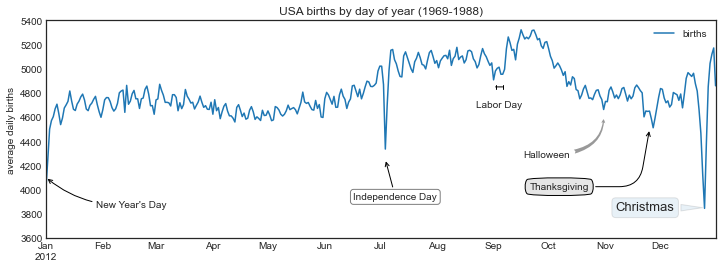

In [11]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

             # word         #data                   #word position 
ax.annotate("New Year's Day", xy=('2012-1-1', 4100),  xycoords='data',
            xytext=(50, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=-0.2"))

ax.annotate("Independence Day", xy=('2012-7-4', 4250),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, -40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))

ax.annotate('Labor Day', xy=('2012-9-4', 4850), xycoords='data', ha='center',
            xytext=(0, -20), textcoords='offset points')

ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850),
            xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2', })

ax.annotate('Halloween', xy=('2012-10-31', 4600),  xycoords='data',
            xytext=(-80, -40), textcoords='offset points',
            arrowprops=dict(arrowstyle="fancy",fc="0.6", ec="none",connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('Thanksgiving', xy=('2012-11-25', 4500),  xycoords='data',
            xytext=(-120, -60), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
            arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=80,rad=20"))

ax.annotate('Christmas', xy=('2012-12-25', 3850),  xycoords='data',
             xytext=(-30, 0), textcoords='offset points',
             size=13, ha='right', va="center",
             bbox=dict(boxstyle="round", alpha=0.1),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1));

# 設置圖表標題和坐標軸標記
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

ax.set_ylim(3600, 5400);